# chapter01 - 文本预处理

## 1. 中文分词

In [9]:
# 主要应用jieba分词工具包进行分词

import jieba

    接下来我们以三体第一部为例，展示分词的一些常用技术方法，首先读取需要的文本：

In [10]:
doc_path = "./datasets/three_body_1.txt"
example_list = []

with open(doc_path, mode='r') as f:
    for i in range(20):
        # print(f.readline())
        line = f.readline()
        if '\n' != line:
            example_list.append(line)

print(example_list)

['《三体》\n', '作者：刘慈欣\n', '正文\n', '前言\n', '\u3000\u3000《三体》终于能与科幻朋友们见面了，用连载的方式事先谁都没有想到，也是无奈之举。之前就题材问题与编辑们仔细商讨过，感觉没有什么问题，但没想到今年是文革三十周年这事儿，单行本一时出不了，也只能这样了。\n', '\u3000\u3000其实这本书不是文革题材的，文革内容在其中只占不到十分之一，但却是一个漂荡在故事中挥之不去的精神幽灵。\n', '\u3000\u3000本书虽不是《球状闪电》的续集，但可以看做那个故事所发生的世界在其后的延续，那个物理学家在故事中出现但已不重要，其他的人则永远消失了，林云真的死了，虽然我有时在想，如果她活下来，最后是不是这个主人公的样子？\n', '\u3000\u3000这是一个暂名为《地球往事》的系列的第一部，可以看做一个更长的故事的开始。\n', '\u3000\u3000这是一个关于背叛的故事，也是一个生存与死亡的故事，有时候，比起生存还是死亡来，忠诚与背叛可能更是一个问题。\n', '\u3000\u3000疯狂与偏执，最终将在人类文明的内部异化出怎样的力量？冷酷的星空将如何拷问心中道德？\n', '\u3000\u3000作者试图讲述一部在光年尺度上重新演绎的中国现代史，讲述一个文明二百次毁灭与重生的传奇。\n']


In [13]:
seg_example = [' '.join(jieba.cut(sent)) for sent in example_list]
print(seg_example)
print("\n\n\n")
seg_example = [jieba.lcut(sent) for sent in example_list]
print(seg_example)

['《 三体 》 \n', '作者 ： 刘慈欣 \n', '正文 \n', '前言 \n', '\u3000 \u3000 《 三体 》 终于 能 与 科幻 朋友 们 见面 了 ， 用 连载 的 方式 事先 谁 都 没有 想到 ， 也 是 无奈 之 举 。 之前 就 题材 问题 与 编辑 们 仔细 商讨 过 ， 感觉 没有 什么 问题 ， 但 没想到 今年 是 文革 三十周年 这 事儿 ， 单行本 一时 出 不了 ， 也 只能 这样 了 。 \n', '\u3000 \u3000 其实 这 本书 不是 文革 题材 的 ， 文革 内容 在 其中 只 占 不到 十分之一 ， 但 却是 一个 漂荡 在 故事 中 挥之不去 的 精神 幽灵 。 \n', '\u3000 \u3000 本书 虽 不是 《 球状 闪电 》 的 续集 ， 但 可以 看做 那个 故事 所 发生 的 世界 在 其后 的 延续 ， 那个 物理学家 在 故事 中 出现 但 已 不 重要 ， 其他 的 人 则 永远 消失 了 ， 林云 真的 死 了 ， 虽然 我 有时 在 想 ， 如果 她 活 下来 ， 最后 是不是 这个 主人公 的 样子 ？ \n', '\u3000 \u3000 这是 一个 暂 名为 《 地球 往事 》 的 系列 的 第一部 ， 可以 看做 一个 更长 的 故事 的 开始 。 \n', '\u3000 \u3000 这是 一个 关于 背叛 的 故事 ， 也 是 一个 生存 与 死亡 的 故事 ， 有时候 ， 比起 生存 还是 死亡 来 ， 忠诚 与 背叛 可能 更是 一个 问题 。 \n', '\u3000 \u3000 疯狂 与 偏执 ， 最终 将 在 人类文明 的 内部 异化 出 怎样 的 力量 ？ 冷酷 的 星空 将 如何 拷问 心中 道德 ？ \n', '\u3000 \u3000 作者 试图 讲述 一部 在 光年 尺度 上 重新 演绎 的 中国 现代史 ， 讲述 一个 文明 二百次 毁灭 与 重生 的 传奇 。 \n']




[['《', '三体', '》', '\n'], ['作者', '：', '刘慈欣', '\n'], ['正文', '\n'], ['前言', '\n'], ['\u3000', '\u3000', '《', '三体', '》', '终于', '能'

    从这个简单的例子我们可以看到，jieba工具包非常的强大，能够非常精确地将每一个句子切分成单个词语。中文分词实际上是一个自然语言处理非常困难的问题，涉及到命名实体识别（Named-Entity Recognition）等多方面的技术作底层支持。有的读者可能会觉得这个输出非常的乱。不要着急，接下来我们会通过一些方法将其“清洗干净”，让它看起来更符合我们的阅读习惯。

    对于一般的分词任务，通常只需要简单地调用 **jieba.cut()** 或 **jieba.lcut()** 函数就可以满足要求，jieba会使用内建分词器进行切分，默认为 **jieba.dt**。jieba.cut()返回的是Tokenizer对象，一般需要插入一些字符使其显示结果。jieba.lcut()则会直接返回列表。对于一些特殊场景下的分词需求，可能会采用到自定义词典、自定义分词器等功能，我们将在后面进一步讨论。
    
    值得一提的是，jieba以分词为代表功能，但其实它也包含了许多其他功能，如关键词抽取等，具体可以参考jieba的github官方文档。

## 2. 文本清洗

    仍然延续上面的例子，我们希望只看到汉字，而不显示其他字符，那么可以这样做：

In [14]:
seg_example = [' '.join(jieba.cut(sent)) for sent in example_list]
seg_example

['《 三体 》 \n',
 '作者 ： 刘慈欣 \n',
 '正文 \n',
 '前言 \n',
 '\u3000 \u3000 《 三体 》 终于 能 与 科幻 朋友 们 见面 了 ， 用 连载 的 方式 事先 谁 都 没有 想到 ， 也 是 无奈 之 举 。 之前 就 题材 问题 与 编辑 们 仔细 商讨 过 ， 感觉 没有 什么 问题 ， 但 没想到 今年 是 文革 三十周年 这 事儿 ， 单行本 一时 出 不了 ， 也 只能 这样 了 。 \n',
 '\u3000 \u3000 其实 这 本书 不是 文革 题材 的 ， 文革 内容 在 其中 只 占 不到 十分之一 ， 但 却是 一个 漂荡 在 故事 中 挥之不去 的 精神 幽灵 。 \n',
 '\u3000 \u3000 本书 虽 不是 《 球状 闪电 》 的 续集 ， 但 可以 看做 那个 故事 所 发生 的 世界 在 其后 的 延续 ， 那个 物理学家 在 故事 中 出现 但 已 不 重要 ， 其他 的 人 则 永远 消失 了 ， 林云 真的 死 了 ， 虽然 我 有时 在 想 ， 如果 她 活 下来 ， 最后 是不是 这个 主人公 的 样子 ？ \n',
 '\u3000 \u3000 这是 一个 暂 名为 《 地球 往事 》 的 系列 的 第一部 ， 可以 看做 一个 更长 的 故事 的 开始 。 \n',
 '\u3000 \u3000 这是 一个 关于 背叛 的 故事 ， 也 是 一个 生存 与 死亡 的 故事 ， 有时候 ， 比起 生存 还是 死亡 来 ， 忠诚 与 背叛 可能 更是 一个 问题 。 \n',
 '\u3000 \u3000 疯狂 与 偏执 ， 最终 将 在 人类文明 的 内部 异化 出 怎样 的 力量 ？ 冷酷 的 星空 将 如何 拷问 心中 道德 ？ \n',
 '\u3000 \u3000 作者 试图 讲述 一部 在 光年 尺度 上 重新 演绎 的 中国 现代史 ， 讲述 一个 文明 二百次 毁灭 与 重生 的 传奇 。 \n']

In [20]:
import re


def pre_repl(string):
    '''把非中文字符去除'''

    pattern = '[^\u4e00-\u9fa5]'
    return re.sub(pattern, '', string)

In [21]:
clean_example = [pre_repl(token) for token in seg_example]
clean_example = [jieba.lcut(sent) for sent in clean_example]
print(clean_example)

[['三体'], ['作者', '刘慈欣'], ['正文'], ['前言'], ['三体', '终于', '能', '与', '科幻', '朋友', '们', '见面', '了', '用', '连载', '的', '方式', '事先', '谁', '都', '没有', '想到', '也', '是', '无奈', '之', '举', '之前', '就', '题材', '问题', '与', '编辑', '们', '仔细', '商讨', '过', '感觉', '没有', '什么', '问题', '但', '没想到', '今年', '是', '文革', '三十周年', '这', '事儿', '单行本', '一时', '出', '不了', '也', '只能', '这样', '了'], ['其实', '这', '本书', '不是', '文革', '题材', '的', '文革', '内容', '在', '其中', '只', '占', '不到', '十分之一', '但', '却是', '一个', '漂荡', '在', '故事', '中', '挥之不去', '的', '精神', '幽灵'], ['本书', '虽', '不是', '球状', '闪电', '的', '续集', '但', '可以', '看做', '那个', '故事', '所', '发生', '的', '世界', '在', '其后', '的', '延续', '那个', '物理学家', '在', '故事', '中', '出现', '但', '已', '不', '重要', '其他', '的', '人', '则', '永远', '消失', '了', '林云', '真的', '死', '了', '虽然', '我', '有时', '在', '想', '如果', '她', '活', '下来', '最后', '是不是', '这个', '主人公', '的', '样子'], ['这是', '一个', '暂', '名为', '地球', '往事', '的', '系列', '的', '第一部', '可以', '看做', '一个', '更长', '的', '故事', '的', '开始'], ['这是', '一个', '关于', '背叛', '的', '故事', '也', '是', '一个', '生存', '与', '死亡', '的', '故事', '

    怎么样？是不是看起来清爽多了？这样jieba强大的分词能力就更加明显了，而清洗过后的文本在之后的分析中也更便于使用。
    
    我们定义的清洗方法中，使用到了字符串处理库re，这可以看作是python对正则表达式的封装，对各种匹配需求都提供了灵活的支持。匹配规则有很多，大家不必记住，只要根据具体的匹配需求现场设计与测试即可。

## 3. 初窥门径

    有些好奇心强的同学可能会问，拿到这样分词的结果之后，还能做些什么事情呢？尽管越过了我们当前讨论的范畴，但我们还是稍微向前延申一下，看看还有什么名堂

    首先来试试统计一下词频：

In [45]:
from collections import Counter

bag_of_words = [word for lis in clean_example for word in lis]
cntr = Counter(bag_of_words)

print(cntr)
print("The top 10 words:")
print(cntr.most_common(10))

Counter({'的': 19, '在': 7, '一个': 7, '与': 6, '故事': 6, '了': 4, '但': 4, '也': 3, '是': 3, '问题': 3, '文革': 3, '三体': 2, '作者': 2, '们': 2, '没有': 2, '题材': 2, '这': 2, '出': 2, '本书': 2, '不是': 2, '中': 2, '可以': 2, '看做': 2, '那个': 2, '这是': 2, '背叛': 2, '生存': 2, '死亡': 2, '将': 2, '讲述': 2, '刘慈欣': 1, '正文': 1, '前言': 1, '终于': 1, '能': 1, '科幻': 1, '朋友': 1, '见面': 1, '用': 1, '连载': 1, '方式': 1, '事先': 1, '谁': 1, '都': 1, '想到': 1, '无奈': 1, '之': 1, '举': 1, '之前': 1, '就': 1, '编辑': 1, '仔细': 1, '商讨': 1, '过': 1, '感觉': 1, '什么': 1, '没想到': 1, '今年': 1, '三十周年': 1, '事儿': 1, '单行本': 1, '一时': 1, '不了': 1, '只能': 1, '这样': 1, '其实': 1, '内容': 1, '其中': 1, '只': 1, '占': 1, '不到': 1, '十分之一': 1, '却是': 1, '漂荡': 1, '挥之不去': 1, '精神': 1, '幽灵': 1, '虽': 1, '球状': 1, '闪电': 1, '续集': 1, '所': 1, '发生': 1, '世界': 1, '其后': 1, '延续': 1, '物理学家': 1, '出现': 1, '已': 1, '不': 1, '重要': 1, '其他': 1, '人': 1, '则': 1, '永远': 1, '消失': 1, '林云': 1, '真的': 1, '死': 1, '虽然': 1, '我': 1, '有时': 1, '想': 1, '如果': 1, '她': 1, '活': 1, '下来': 1, '最后': 1, '是不是': 1, '这个': 1, '主人公': 1, '样子': 1, '暂

    用python3内建模块中的collections中的计数器Counter类可以很方便地进行词频统计，不妨再把频率分布画出来试试看：

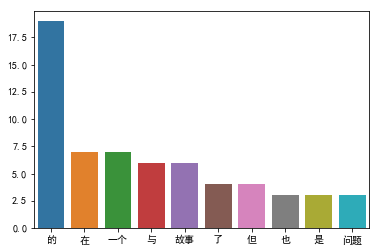

In [48]:
%matplotlib inline
import seaborn as sns
import matplotlib as plt

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

top10 = cntr.most_common(10)
sns.barplot(x=[each[0] for each in top10], y=[each[1] for each in top10])

    这一步虽然简单，但也是文本挖掘任务中的一个基础工作。接下来我们再使用gensim库，稍微做一点事情：

In [24]:
from gensim import corpora

dictionary = corpora.Dictionary(clean_example)
print(dictionary.token2id)

{'三体': 0, '作者': 1, '刘慈欣': 2, '正文': 3, '前言': 4, '一时': 5, '三十周年': 6, '不了': 7, '与': 8, '举': 9, '之': 10, '之前': 11, '也': 12, '了': 13, '事儿': 14, '事先': 15, '什么': 16, '今年': 17, '仔细': 18, '们': 19, '但': 20, '出': 21, '单行本': 22, '只能': 23, '商讨': 24, '就': 25, '想到': 26, '感觉': 27, '文革': 28, '方式': 29, '无奈': 30, '是': 31, '朋友': 32, '没想到': 33, '没有': 34, '用': 35, '的': 36, '科幻': 37, '终于': 38, '编辑': 39, '能': 40, '见面': 41, '谁': 42, '过': 43, '这': 44, '这样': 45, '连载': 46, '都': 47, '问题': 48, '题材': 49, '一个': 50, '不到': 51, '不是': 52, '中': 53, '其中': 54, '其实': 55, '内容': 56, '十分之一': 57, '占': 58, '却是': 59, '只': 60, '在': 61, '幽灵': 62, '挥之不去': 63, '故事': 64, '本书': 65, '漂荡': 66, '精神': 67, '下来': 68, '不': 69, '世界': 70, '主人公': 71, '人': 72, '其他': 73, '其后': 74, '出现': 75, '则': 76, '发生': 77, '可以': 78, '她': 79, '如果': 80, '已': 81, '延续': 82, '想': 83, '我': 84, '所': 85, '是不是': 86, '最后': 87, '有时': 88, '林云': 89, '样子': 90, '死': 91, '永远': 92, '活': 93, '消失': 94, '物理学家': 95, '球状': 96, '看做': 97, '真的': 98, '续集': 99, '虽': 100, '虽然': 101, '这个': 

    像这样，我们创建了一个“词典”，为每个词语分配了一个唯一id。这样形式的表示将有助于计算机理解和处理这些词语，在这个基础上，我们创建对应的语料集：

In [25]:
corpus = [dictionary.doc2bow(each) for each in clean_example]
print(corpus)

[[(0, 1)], [(1, 1), (2, 1)], [(3, 1)], [(4, 1)], [(0, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 2), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 2), (32, 1), (33, 1), (34, 2), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 2), (49, 1)], [(20, 1), (28, 2), (36, 2), (44, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 2), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1)], [(13, 2), (20, 2), (36, 5), (52, 1), (53, 1), (61, 3), (64, 2), (65, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1)

    我们调用了词典的一项方法doc2bow，将clean_example这个二重列表转化成为一个词袋模型（Bag-of-Words）的表示。所谓“词袋”，顾名思义，就是把所有词语一股脑装进一个包里，忽略他们的先后顺序和语义，仅仅强调他们作为显式存在的一个个词语，突出他们出现的频率不通。
    
    观察输出结果，原来的一个个列表中的词语变成了二元组。这个二元组的含义是（词语id，出现频数），如（0，1）表示“三体”一词出现了一次，以此类推。现在你明白为什么要先有词典，才能进行建模了吧！将doc2bow设计成字典类的一个方法，也是有合理的考虑的。
    
    事实上，还能做更多的事情，让我们不加说明地展示一二：

In [26]:
from gensim import models
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',
                    level=logging.INFO)

tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
print(corpus_tfidf)

2019-07-25 17:28:34,482 : INFO : collecting document frequencies
2019-07-25 17:28:34,484 : INFO : PROGRESS: processing document #0
2019-07-25 17:28:34,486 : INFO : calculating IDF weights for 11 documents and 155 features (192 matrix non-zeros)


    观察输出日志信息，模型对11个文档，155个特征进行了计算。也就是说，corpus这个二维列表中的每一个一维列表都会被认为是一个document切分成的词语，词语的总共数量就是特征的数量。我们打印出结果看看：

In [32]:
from pprint import pprint

for i, doc in enumerate(corpus_tfidf):
    print("第%i个：" % i, doc)
    # print(doc)

第0个： [(0, 1.0)]
第1个： [(1, 0.5794285475904607), (2, 0.8150230415376054)]
第2个： [(3, 1.0)]
第3个： [(4, 1.0)]
第4个： [(0, 0.09891763068075399), (5, 0.1391373423942927), (6, 0.1391373423942927), (7, 0.1391373423942927), (8, 0.11739583793443054), (9, 0.1391373423942927), (10, 0.1391373423942927), (11, 0.1391373423942927), (12, 0.19783526136150797), (13, 0.19783526136150797), (14, 0.1391373423942927), (15, 0.1391373423942927), (16, 0.1391373423942927), (17, 0.1391373423942927), (18, 0.1391373423942927), (19, 0.2782746847885854), (20, 0.07539060753851841), (21, 0.09891763068075399), (22, 0.1391373423942927), (23, 0.1391373423942927), (24, 0.1391373423942927), (25, 0.1391373423942927), (26, 0.1391373423942927), (27, 0.1391373423942927), (28, 0.09891763068075399), (29, 0.1391373423942927), (30, 0.1391373423942927), (31, 0.19783526136150797), (32, 0.1391373423942927), (33, 0.1391373423942927), (34, 0.2782746847885854), (35, 0.1391373423942927), (36, 0.026226336751551914), (37, 0.1391373423942927), (3

    对比词袋模型语料，我们看到，这里二元组变为了（词语id，词语的tf-idf权重值）。至于tf-idf是什么，有什么用，我们会在后面的内容进行讲解。

## 4.本章总结
- 应用jieba工具包进行中文分词
- 应用re和正则表达式对文本进行清洗
- 应用gensim库构建词典和tf-idf模型

参考链接：

[https://github.com/fxsjy/jieba]

[https://radimrehurek.com/gensim/]